## Binary classficiation on breast cancer dataset using "Gaussian determinant analysis"

#### Importing required libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Importing the dataset

In [16]:
dataset = pd.read_csv('Dataset/breast-cancer.csv')

# Head of the dataset

dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
# Info of dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### EDA

In [18]:
# Drop duplicate rows if any

dataset = dataset.drop_duplicates()

In [19]:
dataset.shape

(569, 32)

In [20]:
# Unique values in target variable

dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

- 'M' - refers to malignant tumors
- 'B' - refers to benign tumors

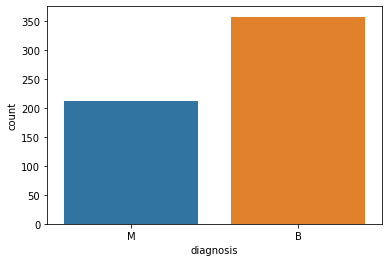

In [21]:
sns.countplot(data=dataset,x='diagnosis')
plt.show()

- There are more benign tumors than malignant ones in this dataset

#### Distribution of the mean features vs the 'diagnosis' variable

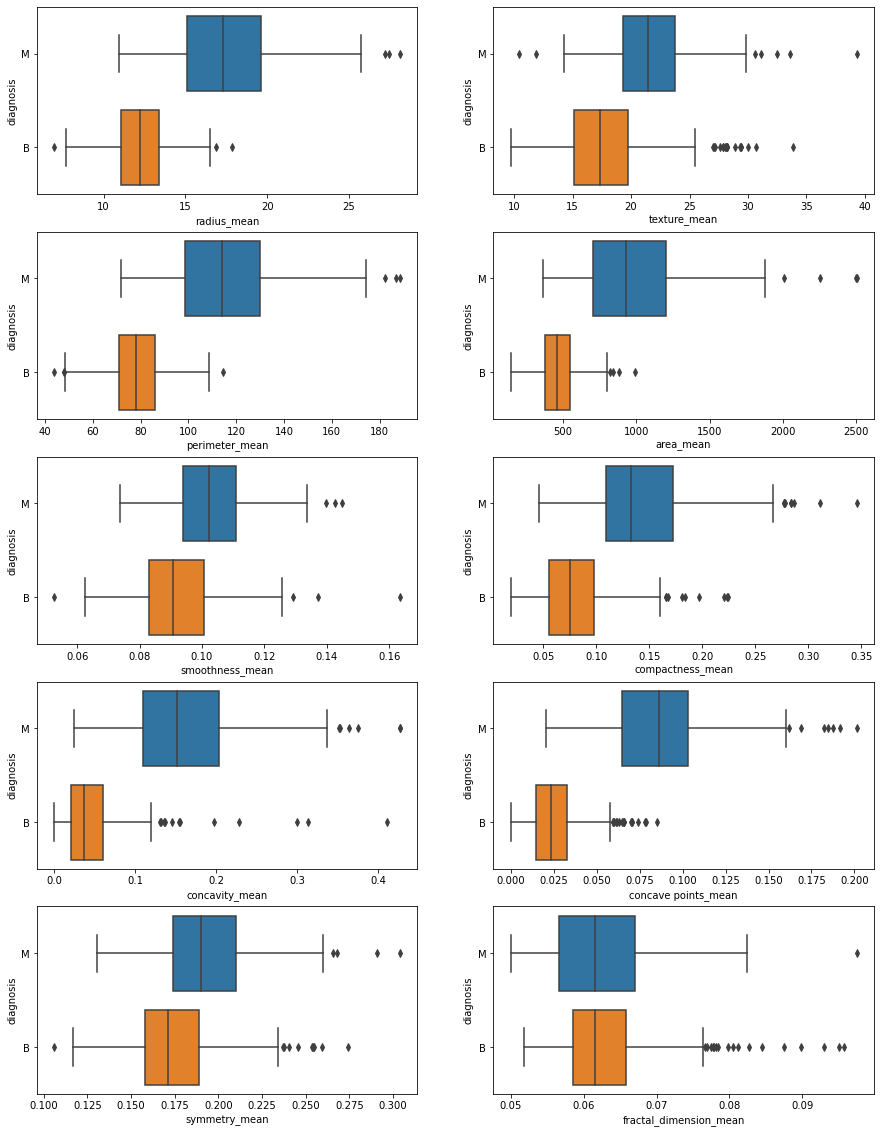

In [22]:
fig = plt.figure(figsize=(15,20))

ax1 = fig.add_subplot(5,2,1)
sns.boxplot(data=dataset,x='radius_mean',y='diagnosis',ax=ax1)

ax2 = fig.add_subplot(5,2,2)
sns.boxplot(data=dataset,x='texture_mean',y='diagnosis',ax=ax2)

ax3 = fig.add_subplot(5,2,3)
sns.boxplot(data=dataset,x='perimeter_mean',y='diagnosis',ax=ax3)

ax4 = fig.add_subplot(5,2,4)
sns.boxplot(data=dataset,x='area_mean',y='diagnosis',ax=ax4)

ax5 = fig.add_subplot(5,2,5)
sns.boxplot(data=dataset,x='smoothness_mean',y='diagnosis',ax=ax5)

ax6 = fig.add_subplot(5,2,6)
sns.boxplot(data=dataset,x='compactness_mean',y='diagnosis',ax=ax6)

ax7 = fig.add_subplot(5,2,7)
sns.boxplot(data=dataset,x='concavity_mean',y='diagnosis',ax=ax7)

ax8 = fig.add_subplot(5,2,8)
sns.boxplot(data=dataset,x='concave points_mean',y='diagnosis',ax=ax8)

ax9 = fig.add_subplot(5,2,9)
sns.boxplot(data=dataset,x='symmetry_mean',y='diagnosis',ax=ax9)

ax10 = fig.add_subplot(5,2,10)
sns.boxplot(data=dataset,x='fractal_dimension_mean',y='diagnosis',ax=ax10)

plt.show()

- <b>radius_mean</b> is more for malignant tumors than benign tumors
- <b>texture_mean</b> is more for malignant tumors than benign tumors
- <b>perimeter_mean</b> is more for malignant tumors than benign tumors
- <b>area_mean</b> is more for malignant tumors than benign tumors
- <b>smoothness_mean</b> is `slightly` more for malignant tumors than benign tumors
- <b>compactness_mean</b> is more for malignant tumors than benign tumors
- <b>concavity_mean</b> is more for malignant tumors than benign tumors
- <b>concave points_mean</b> is more for malignant tumors than benign tumors
- <b>symmetry_mean</b> is more for malignant tumors than benign tumors
- <b>fractal_dimension_mean</b> is `almost same` for malignant tumors and benign tumors

#### Distribution of the se features vs the 'diagnosis' variable

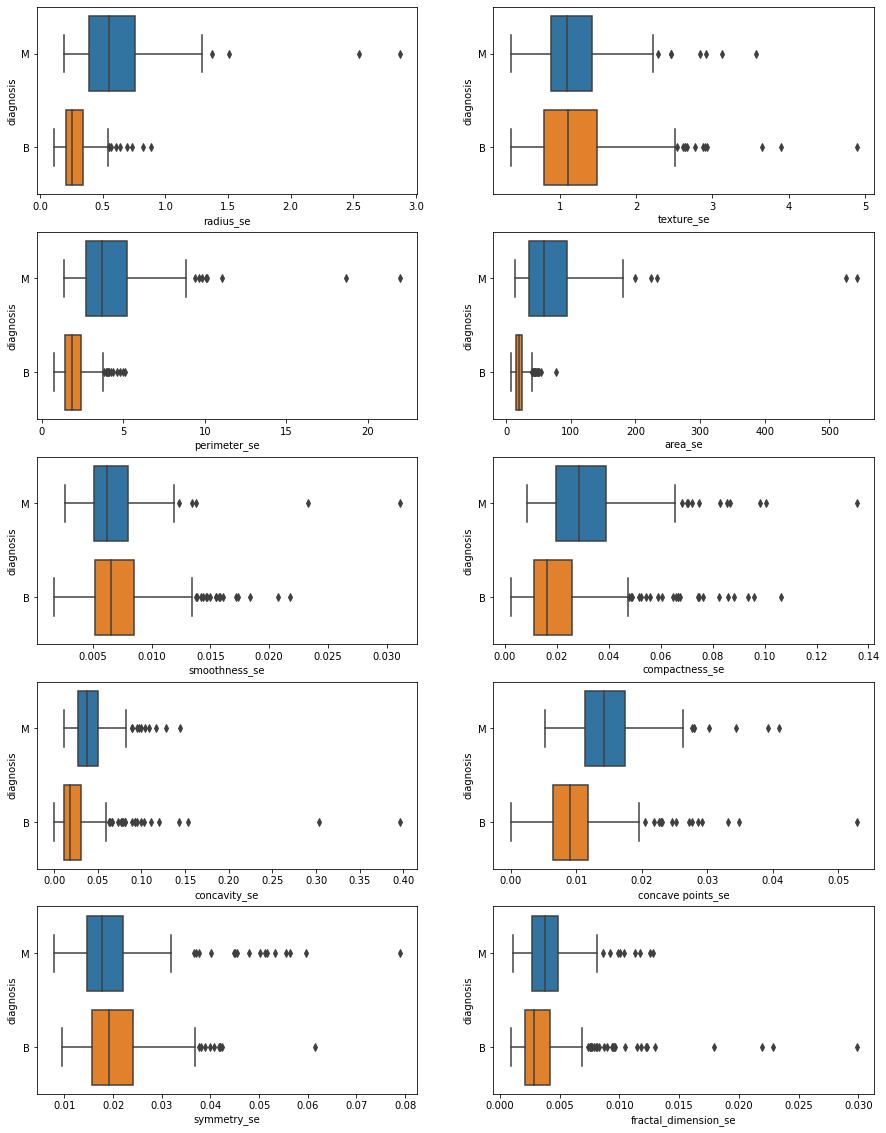

In [23]:
fig = plt.figure(figsize=(15,20))

ax1 = fig.add_subplot(5,2,1)
sns.boxplot(data=dataset,x='radius_se',y='diagnosis',ax=ax1)

ax2 = fig.add_subplot(5,2,2)
sns.boxplot(data=dataset,x='texture_se',y='diagnosis',ax=ax2)

ax3 = fig.add_subplot(5,2,3)
sns.boxplot(data=dataset,x='perimeter_se',y='diagnosis',ax=ax3)

ax4 = fig.add_subplot(5,2,4)
sns.boxplot(data=dataset,x='area_se',y='diagnosis',ax=ax4)

ax5 = fig.add_subplot(5,2,5)
sns.boxplot(data=dataset,x='smoothness_se',y='diagnosis',ax=ax5)

ax6 = fig.add_subplot(5,2,6)
sns.boxplot(data=dataset,x='compactness_se',y='diagnosis',ax=ax6)

ax7 = fig.add_subplot(5,2,7)
sns.boxplot(data=dataset,x='concavity_se',y='diagnosis',ax=ax7)

ax8 = fig.add_subplot(5,2,8)
sns.boxplot(data=dataset,x='concave points_se',y='diagnosis',ax=ax8)

ax9 = fig.add_subplot(5,2,9)
sns.boxplot(data=dataset,x='symmetry_se',y='diagnosis',ax=ax9)

ax10 = fig.add_subplot(5,2,10)
sns.boxplot(data=dataset,x='fractal_dimension_se',y='diagnosis',ax=ax10)

plt.show()

- <b>radius_se</b> is more for malignant tumors than benign tumors
- <b>texture_se</b> is `almost same` for malignant tumors and benign tumors , let us see if this feature can be removed
- <b>perimeter_se</b> is more for malignant tumors than benign tumors
- <b>area_se</b> is more for malignant tumors than benign tumors
- <b>smoothness_se</b> is `almost same` for malignant tumors and benign tumors , let us see if this feature can be removed
- <b>compactness_se</b> is `slightly` more for malignant tumors than benign tumors
- <b>concavity_se</b> is `slightly` more for malignant tumors than benign tumors
- <b>concave points_se</b> is more for malignant tumors than benign tumors
- <b>symmetry_se</b> is `almost same` for malignant tumors and benign tumors , let us see if this feature can be removed
- <b>fractal_dimension_se</b> is `almost same` for malignant tumors and benign tumors , let us see if this feature can be removed

#### Distribution of the worst features vs the 'diagnosis' variable

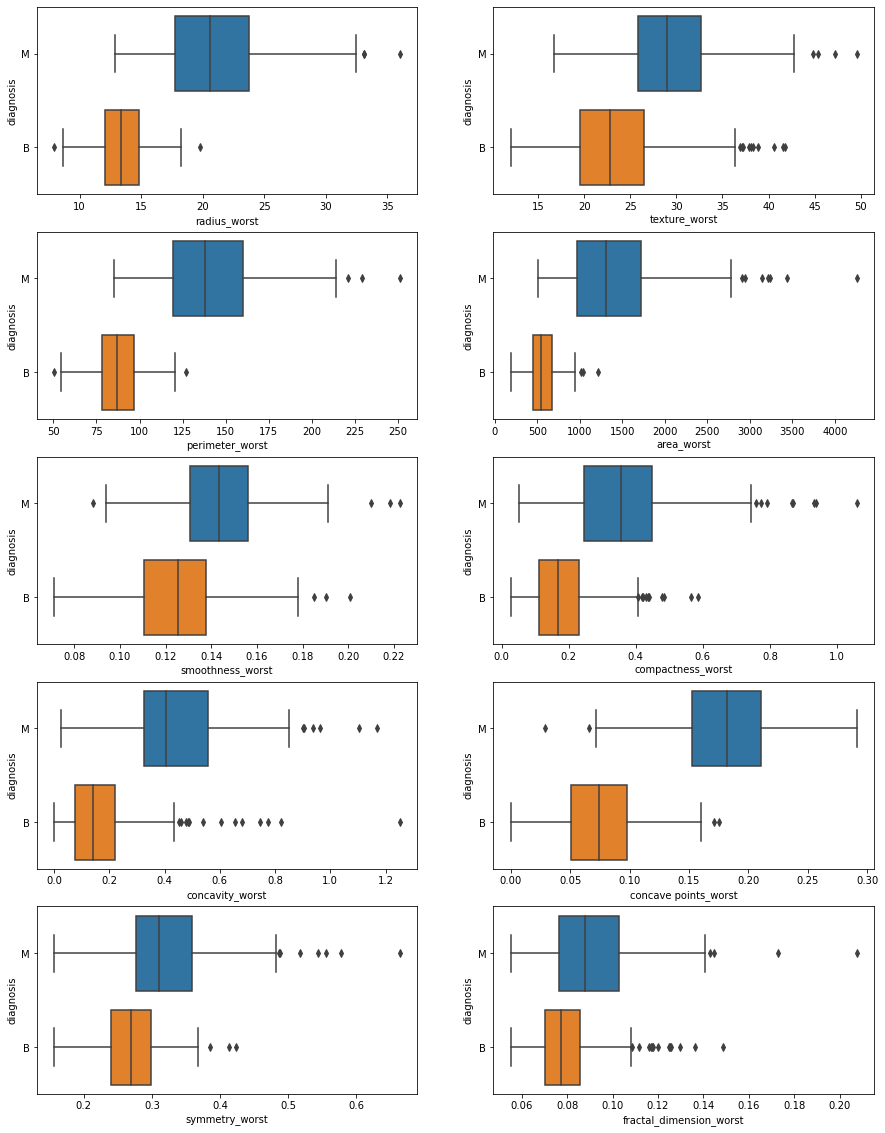

In [24]:
fig = plt.figure(figsize=(15,20))

ax1 = fig.add_subplot(5,2,1)
sns.boxplot(data=dataset,x='radius_worst',y='diagnosis',ax=ax1)

ax2 = fig.add_subplot(5,2,2)
sns.boxplot(data=dataset,x='texture_worst',y='diagnosis',ax=ax2)

ax3 = fig.add_subplot(5,2,3)
sns.boxplot(data=dataset,x='perimeter_worst',y='diagnosis',ax=ax3)

ax4 = fig.add_subplot(5,2,4)
sns.boxplot(data=dataset,x='area_worst',y='diagnosis',ax=ax4)

ax5 = fig.add_subplot(5,2,5)
sns.boxplot(data=dataset,x='smoothness_worst',y='diagnosis',ax=ax5)

ax6 = fig.add_subplot(5,2,6)
sns.boxplot(data=dataset,x='compactness_worst',y='diagnosis',ax=ax6)

ax7 = fig.add_subplot(5,2,7)
sns.boxplot(data=dataset,x='concavity_worst',y='diagnosis',ax=ax7)

ax8 = fig.add_subplot(5,2,8)
sns.boxplot(data=dataset,x='concave points_worst',y='diagnosis',ax=ax8)

ax9 = fig.add_subplot(5,2,9)
sns.boxplot(data=dataset,x='symmetry_worst',y='diagnosis',ax=ax9)

ax10 = fig.add_subplot(5,2,10)
sns.boxplot(data=dataset,x='fractal_dimension_worst',y='diagnosis',ax=ax10)

plt.show()

- <b>radius_worst</b> is more for malignant tumors than benign tumors
- <b>texture_worst</b> is more for malignant tumors than benign tumors
- <b>perimeter_worst</b> is more for malignant tumors than benign tumors
- <b>area_worst</b> is more for malignant tumors than benign tumors
- <b>smoothness_worst</b> is more for malignant tumors than benign tumors
- <b>compactness_worst</b> is more for malignant tumors than benign tumors
- <b>concavity_worst</b> is more for malignant tumors than benign tumors
- <b>concave points_worst</b> is more for malignant tumors than benign tumors
- <b>symmetry_worst</b> is more for malignant tumors than benign tumorss
- <b>fractal_dimension_worst</b> is more for malignant tumors than benign tumors

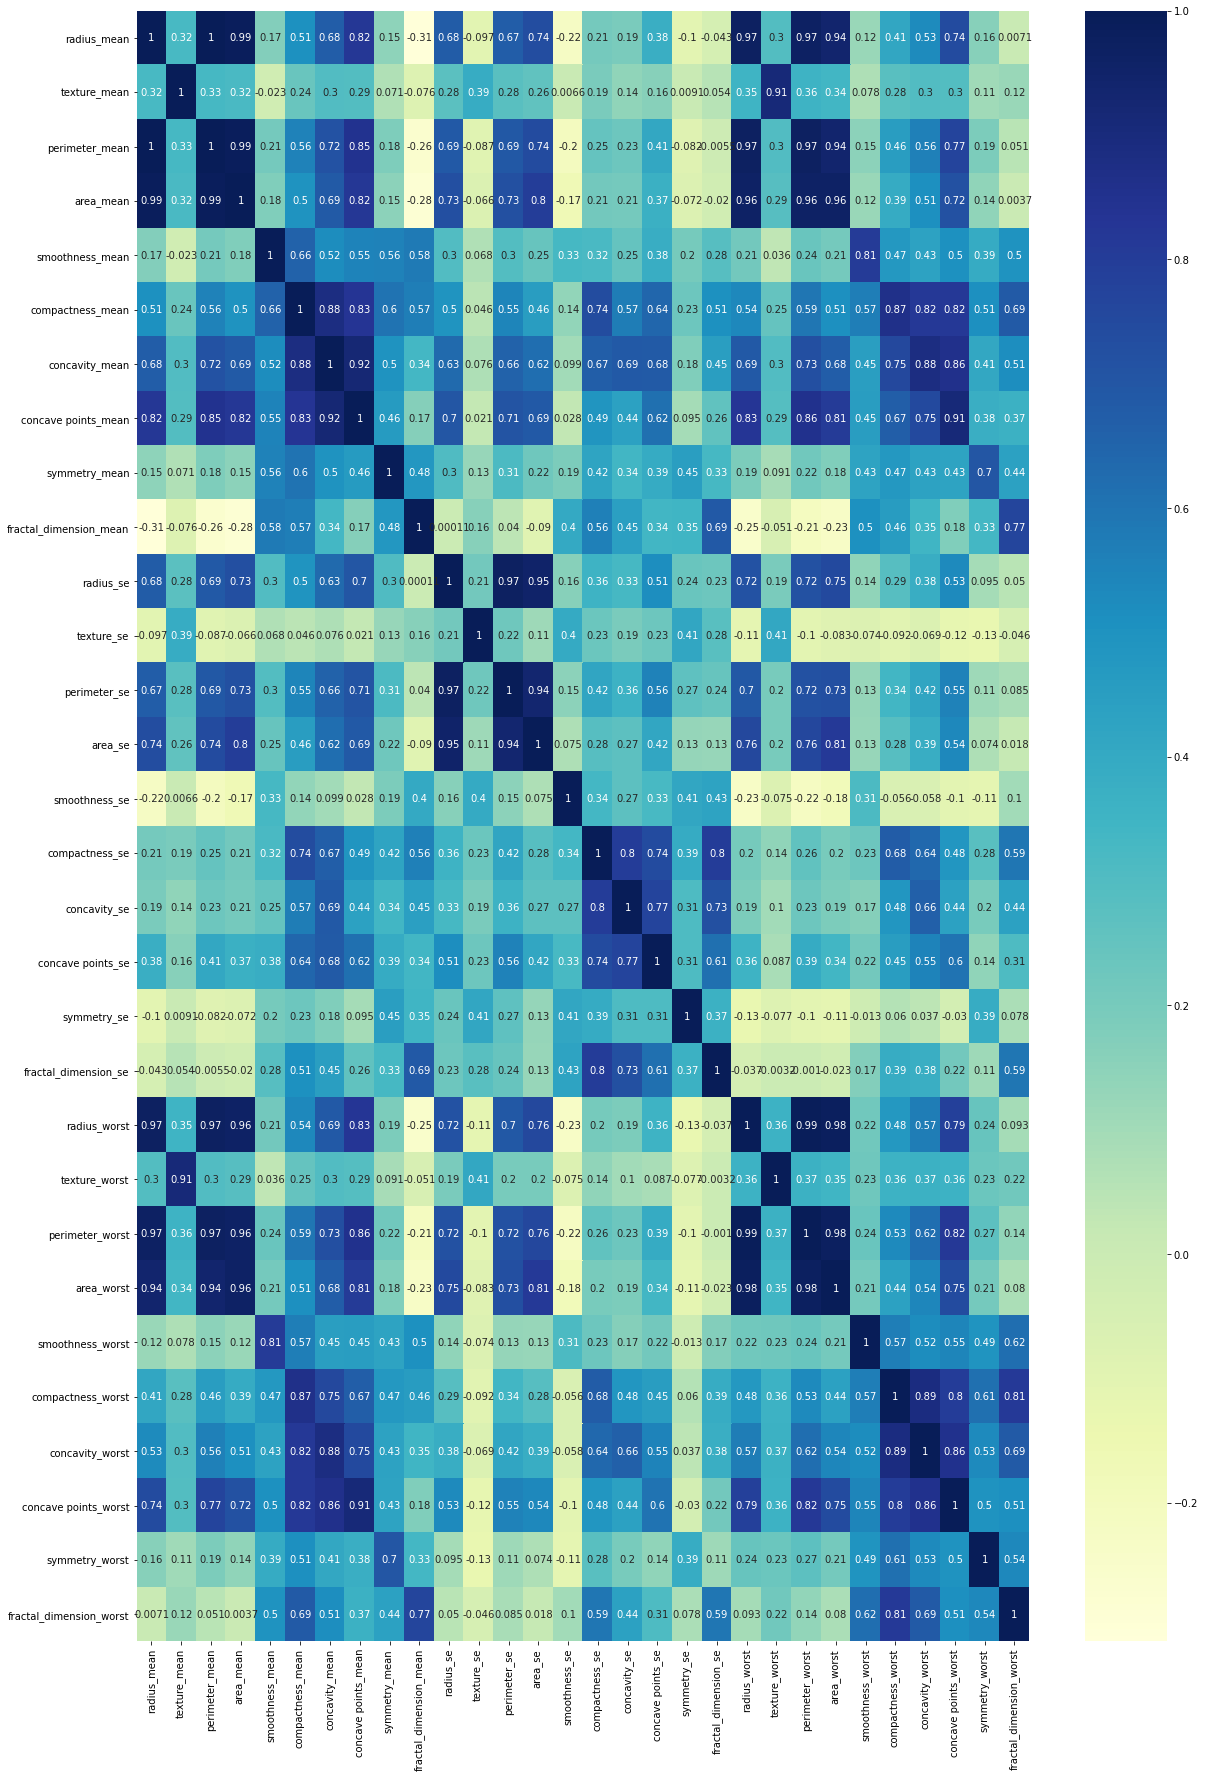

In [44]:
heatmap_data = dataset.copy()
heatmap_data = heatmap_data.drop(['id','diagnosis'],axis=1)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(30)
sns.heatmap(heatmap_data.corr(),annot=True,cmap='YlGnBu')
plt.show()

#### A function which prints all the correlated columns for a given column

In [62]:
def print_correlated_columns(row):
    df = heatmap_data.corr()
    all_cols = list(df.columns)
    
    for col in all_cols:
        if col != row:
            corr_val = df[row][col]
            
            if((abs(corr_val) >= 0.6)):
                print("{0} is correlated to {1} by a value of {2}".format(row,col,corr_val)) 

In [63]:
# Print all the columns correlated to radius_mean

print_correlated_columns('radius_mean')    

radius_mean is correlated to perimeter_mean by a value of 0.9978552814938113
radius_mean is correlated to area_mean by a value of 0.9873571700566119
radius_mean is correlated to concavity_mean by a value of 0.6767635503908116
radius_mean is correlated to concave points_mean by a value of 0.8225285223871791
radius_mean is correlated to radius_se by a value of 0.6790903880020752
radius_mean is correlated to perimeter_se by a value of 0.6741716157641062
radius_mean is correlated to area_se by a value of 0.7358636632128175
radius_mean is correlated to radius_worst by a value of 0.9695389726112053
radius_mean is correlated to perimeter_worst by a value of 0.9651365139559878
radius_mean is correlated to area_worst by a value of 0.9410824595860459
radius_mean is correlated to concave points_worst by a value of 0.7442141978674656


- 'radius_mean' is highly correlated to many columns

In [64]:
# Print all the columns correlated to texture_mean

print_correlated_columns('texture_mean')  

texture_mean is correlated to texture_worst by a value of 0.9120445888404215


- 'texture_mean' is highly correlated to 'texture_worst'

In [65]:
# Print all the columns correlated to perimeter_mean

print_correlated_columns('perimeter_mean')  

perimeter_mean is correlated to radius_mean by a value of 0.9978552814938113
perimeter_mean is correlated to area_mean by a value of 0.9865068039913906
perimeter_mean is correlated to concavity_mean by a value of 0.7161356501174044
perimeter_mean is correlated to concave points_mean by a value of 0.8509770412528199
perimeter_mean is correlated to radius_se by a value of 0.6917650135334821
perimeter_mean is correlated to perimeter_se by a value of 0.693134889540866
perimeter_mean is correlated to area_se by a value of 0.7449826941190679
perimeter_mean is correlated to radius_worst by a value of 0.9694763634663142
perimeter_mean is correlated to perimeter_worst by a value of 0.9703868870426388
perimeter_mean is correlated to area_worst by a value of 0.9415498080023057
perimeter_mean is correlated to concave points_worst by a value of 0.7712407893605479


In [66]:
# Print all the columns correlated to area_mean

print_correlated_columns('area_mean')  

area_mean is correlated to radius_mean by a value of 0.9873571700566119
area_mean is correlated to perimeter_mean by a value of 0.9865068039913906
area_mean is correlated to concavity_mean by a value of 0.6859828285519113
area_mean is correlated to concave points_mean by a value of 0.823268868652435
area_mean is correlated to radius_se by a value of 0.7325622269972976
area_mean is correlated to perimeter_se by a value of 0.7266283277906854
area_mean is correlated to area_se by a value of 0.8000859212343217
area_mean is correlated to radius_worst by a value of 0.9627460860470841
area_mean is correlated to perimeter_worst by a value of 0.959119574355266
area_mean is correlated to area_worst by a value of 0.9592133256499006
area_mean is correlated to concave points_worst by a value of 0.722016626260358


In [67]:
# Print all the columns correlated to smoothness_mean

print_correlated_columns('smoothness_mean')  

smoothness_mean is correlated to compactness_mean by a value of 0.6591232152159219
smoothness_mean is correlated to smoothness_worst by a value of 0.8053241954943631


In [68]:
# Print all the columns correlated to compactness_mean

print_correlated_columns('compactness_mean')

compactness_mean is correlated to smoothness_mean by a value of 0.6591232152159219
compactness_mean is correlated to concavity_mean by a value of 0.8831206701772499
compactness_mean is correlated to concave points_mean by a value of 0.8311350431336992
compactness_mean is correlated to symmetry_mean by a value of 0.602641048405516
compactness_mean is correlated to compactness_se by a value of 0.7387217896603926
compactness_mean is correlated to concave points_se by a value of 0.6422618509716465
compactness_mean is correlated to compactness_worst by a value of 0.8658090398022638
compactness_mean is correlated to concavity_worst by a value of 0.8162752498000281
compactness_mean is correlated to concave points_worst by a value of 0.8155732235690654
compactness_mean is correlated to fractal_dimension_worst by a value of 0.6873823227538962


In [69]:
# Print all the columns correlated to concavity_mean

print_correlated_columns('concavity_mean')

concavity_mean is correlated to radius_mean by a value of 0.6767635503908116
concavity_mean is correlated to perimeter_mean by a value of 0.7161356501174044
concavity_mean is correlated to area_mean by a value of 0.6859828285519113
concavity_mean is correlated to compactness_mean by a value of 0.8831206701772499
concavity_mean is correlated to concave points_mean by a value of 0.9213910263788594
concavity_mean is correlated to radius_se by a value of 0.6319248221414899
concavity_mean is correlated to perimeter_se by a value of 0.6603907872419623
concavity_mean is correlated to area_se by a value of 0.6174268058452416
concavity_mean is correlated to compactness_se by a value of 0.6702788246430197
concavity_mean is correlated to concavity_se by a value of 0.6912702075448516
concavity_mean is correlated to concave points_se by a value of 0.6832599165123265
concavity_mean is correlated to radius_worst by a value of 0.6882364076436723
concavity_mean is correlated to perimeter_worst by a val

In [70]:
# Print all the columns correlated to concave points_mean

print_correlated_columns('concave points_mean')

concave points_mean is correlated to radius_mean by a value of 0.8225285223871791
concave points_mean is correlated to perimeter_mean by a value of 0.8509770412528199
concave points_mean is correlated to area_mean by a value of 0.823268868652435
concave points_mean is correlated to compactness_mean by a value of 0.8311350431336992
concave points_mean is correlated to concavity_mean by a value of 0.9213910263788594
concave points_mean is correlated to radius_se by a value of 0.6980498335607405
concave points_mean is correlated to perimeter_se by a value of 0.710649871613899
concave points_mean is correlated to area_se by a value of 0.6902985397595536
concave points_mean is correlated to concave points_se by a value of 0.6156341308969191
concave points_mean is correlated to radius_worst by a value of 0.8303176311186149
concave points_mean is correlated to perimeter_worst by a value of 0.8559231281343112
concave points_mean is correlated to area_worst by a value of 0.8096296199096177
conc

In [71]:
# Print all the columns correlated to symmetry_mean

print_correlated_columns('symmetry_mean')

symmetry_mean is correlated to compactness_mean by a value of 0.602641048405516
symmetry_mean is correlated to symmetry_worst by a value of 0.6998257976437318


In [72]:
# Print all the columns correlated to fractal_dimension_mean

print_correlated_columns('fractal_dimension_mean')

fractal_dimension_mean is correlated to fractal_dimension_se by a value of 0.6881315774585518
fractal_dimension_mean is correlated to fractal_dimension_worst by a value of 0.7672967792384351


In [73]:
# Print all the columns correlated to radius_se

print_correlated_columns('radius_se')

radius_se is correlated to radius_mean by a value of 0.6790903880020752
radius_se is correlated to perimeter_mean by a value of 0.6917650135334821
radius_se is correlated to area_mean by a value of 0.7325622269972976
radius_se is correlated to concavity_mean by a value of 0.6319248221414899
radius_se is correlated to concave points_mean by a value of 0.6980498335607405
radius_se is correlated to perimeter_se by a value of 0.9727936770160752
radius_se is correlated to area_se by a value of 0.95183011211099
radius_se is correlated to radius_worst by a value of 0.7150651951351847
radius_se is correlated to perimeter_worst by a value of 0.7196838036650056
radius_se is correlated to area_worst by a value of 0.7515484761266196


In [77]:
# Print all the columns correlated to texture_se 

print_correlated_columns('texture_se')

In [78]:
# Print all the columns correlated to perimeter_se 

print_correlated_columns('perimeter_se')

perimeter_se is correlated to radius_mean by a value of 0.6741716157641062
perimeter_se is correlated to perimeter_mean by a value of 0.693134889540866
perimeter_se is correlated to area_mean by a value of 0.7266283277906854
perimeter_se is correlated to concavity_mean by a value of 0.6603907872419623
perimeter_se is correlated to concave points_mean by a value of 0.710649871613899
perimeter_se is correlated to radius_se by a value of 0.9727936770160752
perimeter_se is correlated to area_se by a value of 0.9376554069544158
perimeter_se is correlated to radius_worst by a value of 0.6972005927206462
perimeter_se is correlated to perimeter_worst by a value of 0.7210313099890179
perimeter_se is correlated to area_worst by a value of 0.7307129731302835


In [79]:
# Print all the columns correlated to area_se 

print_correlated_columns('area_se')

area_se is correlated to radius_mean by a value of 0.7358636632128175
area_se is correlated to perimeter_mean by a value of 0.7449826941190679
area_se is correlated to area_mean by a value of 0.8000859212343217
area_se is correlated to concavity_mean by a value of 0.6174268058452416
area_se is correlated to concave points_mean by a value of 0.6902985397595536
area_se is correlated to radius_se by a value of 0.95183011211099
area_se is correlated to perimeter_se by a value of 0.9376554069544158
area_se is correlated to radius_worst by a value of 0.7573731889240161
area_se is correlated to perimeter_worst by a value of 0.761212636068759
area_se is correlated to area_worst by a value of 0.8114079609317285


In [80]:
# Print all the columns correlated to smoothness_se

print_correlated_columns('smoothness_se')

In [81]:
# Print all the columns correlated to compactness_se

print_correlated_columns('compactness_se')

compactness_se is correlated to compactness_mean by a value of 0.7387217896603926
compactness_se is correlated to concavity_mean by a value of 0.6702788246430197
compactness_se is correlated to concavity_se by a value of 0.8012683427383301
compactness_se is correlated to concave points_se by a value of 0.7440826676953249
compactness_se is correlated to fractal_dimension_se by a value of 0.8032688176617685
compactness_se is correlated to compactness_worst by a value of 0.6787803543724954
compactness_se is correlated to concavity_worst by a value of 0.6391466977559199


In [82]:
# Print all the columns correlated to concavity_se

print_correlated_columns('concavity_se')

concavity_se is correlated to concavity_mean by a value of 0.6912702075448516
concavity_se is correlated to compactness_se by a value of 0.8012683427383301
concavity_se is correlated to concave points_se by a value of 0.771803994923847
concavity_se is correlated to fractal_dimension_se by a value of 0.7273721838811942
concavity_se is correlated to concavity_worst by a value of 0.6625641337427421


In [83]:
# Print all the columns correlated to concave points_se

print_correlated_columns('concave points_se')

concave points_se is correlated to compactness_mean by a value of 0.6422618509716465
concave points_se is correlated to concavity_mean by a value of 0.6832599165123265
concave points_se is correlated to concave points_mean by a value of 0.6156341308969191
concave points_se is correlated to compactness_se by a value of 0.7440826676953249
concave points_se is correlated to concavity_se by a value of 0.771803994923847
concave points_se is correlated to fractal_dimension_se by a value of 0.6110441393807232
concave points_se is correlated to concave points_worst by a value of 0.6024496059209876


In [84]:
# Print all the columns correlated to symmetry_se

print_correlated_columns('symmetry_se')

In [85]:
# Print all the columns correlated to fractal_dimension_se

print_correlated_columns('fractal_dimension_se')

fractal_dimension_se is correlated to fractal_dimension_mean by a value of 0.6881315774585518
fractal_dimension_se is correlated to compactness_se by a value of 0.8032688176617685
fractal_dimension_se is correlated to concavity_se by a value of 0.7273721838811942
fractal_dimension_se is correlated to concave points_se by a value of 0.6110441393807232


In [86]:
# Print all the columns correlated to radius_worst

print_correlated_columns('radius_worst')

radius_worst is correlated to radius_mean by a value of 0.9695389726112053
radius_worst is correlated to perimeter_mean by a value of 0.9694763634663142
radius_worst is correlated to area_mean by a value of 0.9627460860470841
radius_worst is correlated to concavity_mean by a value of 0.6882364076436723
radius_worst is correlated to concave points_mean by a value of 0.8303176311186149
radius_worst is correlated to radius_se by a value of 0.7150651951351847
radius_worst is correlated to perimeter_se by a value of 0.6972005927206462
radius_worst is correlated to area_se by a value of 0.7573731889240161
radius_worst is correlated to perimeter_worst by a value of 0.993707916102951
radius_worst is correlated to area_worst by a value of 0.9840145644590724
radius_worst is correlated to concave points_worst by a value of 0.7874238517122413


In [87]:
# Print all the columns correlated to texture_worst

print_correlated_columns('texture_worst')

texture_worst is correlated to texture_mean by a value of 0.9120445888404215


In [88]:
# Print all the columns correlated to perimeter_worst

print_correlated_columns('perimeter_worst')

perimeter_worst is correlated to radius_mean by a value of 0.9651365139559878
perimeter_worst is correlated to perimeter_mean by a value of 0.9703868870426388
perimeter_worst is correlated to area_mean by a value of 0.959119574355266
perimeter_worst is correlated to concavity_mean by a value of 0.7295649165132022
perimeter_worst is correlated to concave points_mean by a value of 0.8559231281343112
perimeter_worst is correlated to radius_se by a value of 0.7196838036650056
perimeter_worst is correlated to perimeter_se by a value of 0.7210313099890179
perimeter_worst is correlated to area_se by a value of 0.761212636068759
perimeter_worst is correlated to radius_worst by a value of 0.993707916102951
perimeter_worst is correlated to area_worst by a value of 0.9775780914063881
perimeter_worst is correlated to concavity_worst by a value of 0.6183440795335159
perimeter_worst is correlated to concave points_worst by a value of 0.8163221016875445


In [89]:
# Print all the columns correlated to area_worst

print_correlated_columns('area_worst')

area_worst is correlated to radius_mean by a value of 0.9410824595860459
area_worst is correlated to perimeter_mean by a value of 0.9415498080023057
area_worst is correlated to area_mean by a value of 0.9592133256499006
area_worst is correlated to concavity_mean by a value of 0.6759872313060878
area_worst is correlated to concave points_mean by a value of 0.8096296199096177
area_worst is correlated to radius_se by a value of 0.7515484761266196
area_worst is correlated to perimeter_se by a value of 0.7307129731302835
area_worst is correlated to area_se by a value of 0.8114079609317285
area_worst is correlated to radius_worst by a value of 0.9840145644590724
area_worst is correlated to perimeter_worst by a value of 0.9775780914063881
area_worst is correlated to concave points_worst by a value of 0.7474188023228173


In [90]:
# Print all the columns correlated to smoothness_worst

print_correlated_columns('smoothness_worst')

smoothness_worst is correlated to smoothness_mean by a value of 0.8053241954943631
smoothness_worst is correlated to fractal_dimension_worst by a value of 0.6176241916554381


In [91]:
# Print all the columns correlated to compactness_worst

print_correlated_columns('compactness_worst')

compactness_worst is correlated to compactness_mean by a value of 0.8658090398022638
compactness_worst is correlated to concavity_mean by a value of 0.7549680159063971
compactness_worst is correlated to concave points_mean by a value of 0.6674536768257113
compactness_worst is correlated to compactness_se by a value of 0.6787803543724954
compactness_worst is correlated to concavity_worst by a value of 0.8922608987764692
compactness_worst is correlated to concave points_worst by a value of 0.801080364635253
compactness_worst is correlated to symmetry_worst by a value of 0.6144405011493058
compactness_worst is correlated to fractal_dimension_worst by a value of 0.8104548563116136


In [92]:
# Print all the columns correlated to concavity_worst

print_correlated_columns('concavity_worst')

concavity_worst is correlated to compactness_mean by a value of 0.8162752498000281
concavity_worst is correlated to concavity_mean by a value of 0.8841026390943831
concavity_worst is correlated to concave points_mean by a value of 0.7523994975749646
concavity_worst is correlated to compactness_se by a value of 0.6391466977559199
concavity_worst is correlated to concavity_se by a value of 0.6625641337427421
concavity_worst is correlated to perimeter_worst by a value of 0.6183440795335159
concavity_worst is correlated to compactness_worst by a value of 0.8922608987764692
concavity_worst is correlated to concave points_worst by a value of 0.8554338603439984
concavity_worst is correlated to fractal_dimension_worst by a value of 0.6865109212448627


In [93]:
# Print all the columns correlated to concave points_worst

print_correlated_columns('concave points_worst')

concave points_worst is correlated to radius_mean by a value of 0.7442141978674656
concave points_worst is correlated to perimeter_mean by a value of 0.7712407893605479
concave points_worst is correlated to area_mean by a value of 0.722016626260358
concave points_worst is correlated to compactness_mean by a value of 0.8155732235690654
concave points_worst is correlated to concavity_mean by a value of 0.8613230336379504
concave points_worst is correlated to concave points_mean by a value of 0.9101553142985934
concave points_worst is correlated to concave points_se by a value of 0.6024496059209876
concave points_worst is correlated to radius_worst by a value of 0.7874238517122413
concave points_worst is correlated to perimeter_worst by a value of 0.8163221016875445
concave points_worst is correlated to area_worst by a value of 0.7474188023228173
concave points_worst is correlated to compactness_worst by a value of 0.801080364635253
concave points_worst is correlated to concavity_worst by

In [94]:
# Print all the columns correlated to symmetry_worst

print_correlated_columns('symmetry_worst')

symmetry_worst is correlated to symmetry_mean by a value of 0.6998257976437318
symmetry_worst is correlated to compactness_worst by a value of 0.6144405011493058


In [95]:
# Print all the columns correlated to fractal_dimension_worst

print_correlated_columns('fractal_dimension_worst')

fractal_dimension_worst is correlated to compactness_mean by a value of 0.6873823227538962
fractal_dimension_worst is correlated to fractal_dimension_mean by a value of 0.7672967792384351
fractal_dimension_worst is correlated to smoothness_worst by a value of 0.6176241916554381
fractal_dimension_worst is correlated to compactness_worst by a value of 0.8104548563116136
fractal_dimension_worst is correlated to concavity_worst by a value of 0.6865109212448627


#### Correlation findings conclusion

- 